In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params
import plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

**Fix parameters**

Data folder and which part of the catalog is used

In [7]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
data_dir = str(os.environ.get('IMGEN_DATA'))
data_dir = '/pbs/home/b/barcelin/sps_link/data'
cosmos_cat_dir = os.path.join(data_dir,'COSMOS_25.2_training_sample')

In [9]:
data_dir, cosmos_cat_dir

('/pbs/home/b/barcelin/sps_link/data',
 '/pbs/home/b/barcelin/sps_link/data/COSMOS_25.2_training_sample')

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [27]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'annulus'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [28]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [29]:
res[2]

{'e1_fit_0': -0.5678313660175127,
 'e2_fit_0': -0.24729057016682238,
 'weight_fit_0': 227.14470054240837,
 'redshift_0': 0.7159000039100647,
 'moment_sigma_0': 1.936398983001709,
 'e1_ksb_0': -0.21069703996181488,
 'e2_ksb_0': -0.7285242676734924,
 'mag_0': 25.608426644551674,
 'fwhm_lsst': 0.65,
 'nb_blended_gal': 1,
 'mag': 25.608426644551674,
 'mag_ir': -2.4501412222578,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 119.62687493886655,
 'SNR_peak': 0.14178062781407255}

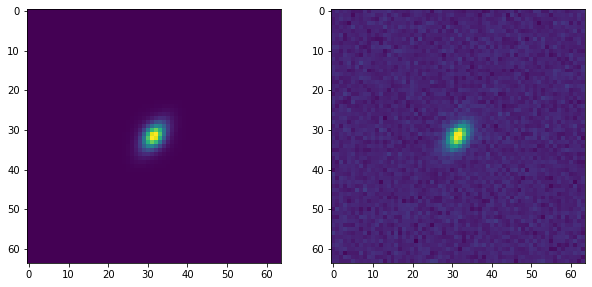

In [30]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [38]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [39]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [40]:
res[2]

{'e1_fit_0': -0.15064176508529986,
 'e2_fit_0': 0.2507582318093699,
 'weight_fit_0': 607.579646553914,
 'e1_fit_1': 0.0046749101767072365,
 'e2_fit_1': 0.724119081679941,
 'weight_fit_1': 477.6614812629027,
 'e1_fit_2': 0.23012341110948142,
 'e2_fit_2': -0.09695529482184623,
 'weight_fit_2': 286.695674072078,
 'e1_fit_3': 0.4429454398675079,
 'e2_fit_3': -0.28141264239761116,
 'weight_fit_3': 455.03391930282584,
 'e1_fit_4': -0.3368008738243094,
 'e2_fit_4': 0.8198484325776361,
 'weight_fit_4': 506.5311818846013,
 'e1_fit_5': -0.1808717677842331,
 'e2_fit_5': 0.12990065043324323,
 'weight_fit_5': 474.09726766320335,
 'redshift_0': 0.6334999799728394,
 'moment_sigma_0': 2.350044012069702,
 'e1_ksb_0': 0.13383249938488007,
 'e2_ksb_0': -0.06286384910345078,
 'mag_0': 25.9049523632006,
 'redshift_1': 0.998199999332428,
 'moment_sigma_1': 1.9419493675231934,
 'e1_ksb_1': -0.481660395860672,
 'e2_ksb_1': 0.22103692591190338,
 'mag_1': 26.71144938467381,
 'redshift_2': 0.7552000284194946,
 '

Display noiseless brightest galaxy and blend images

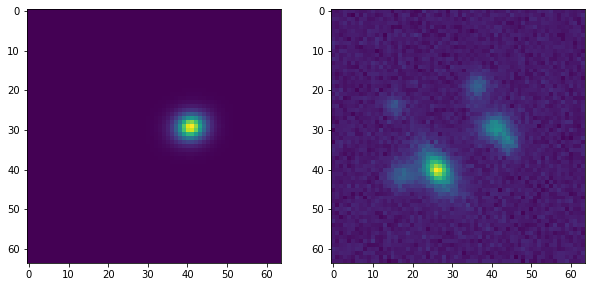

In [41]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Display all noiseless galaxies

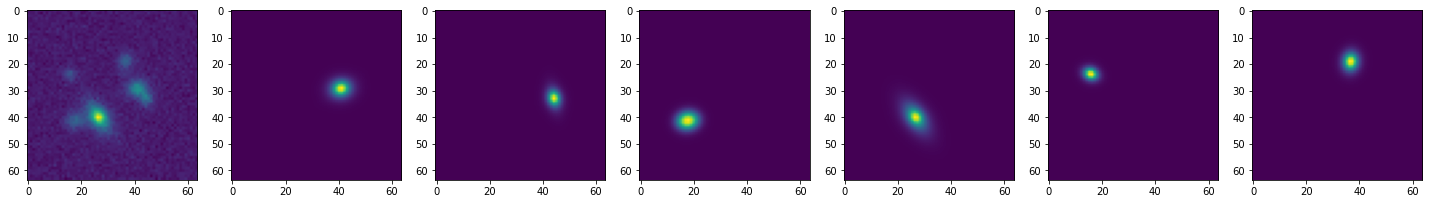

In [42]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [43]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [44]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [45]:
res[2]

{'e1_fit_0': -0.004574186838840206,
 'e2_fit_0': -0.27481944568735894,
 'weight_fit_0': 376.9189553721013,
 'e1_fit_1': -0.11238507368885182,
 'e2_fit_1': 0.31565568684558737,
 'weight_fit_1': 324.09552486326197,
 'e1_fit_2': nan,
 'e2_fit_2': nan,
 'weight_fit_2': nan,
 'e1_fit_3': nan,
 'e2_fit_3': nan,
 'weight_fit_3': nan,
 'e1_fit_4': nan,
 'e2_fit_4': nan,
 'weight_fit_4': nan,
 'redshift_0': 0.14480000734329224,
 'moment_sigma_0': 1.6143310070037842,
 'e1_ksb_0': -0.12287261337041855,
 'e2_ksb_0': 0.24327854812145233,
 'mag_0': 27.16221687722687,
 'redshift_1': 0.6219000220298767,
 'moment_sigma_1': 2.0882949829101562,
 'e1_ksb_1': 0.4468759000301361,
 'e2_ksb_1': -0.1472371220588684,
 'mag_1': 26.97475107647181,
 'redshift_2': 10.0,
 'moment_sigma_2': 10.0,
 'e1_ksb_2': 10.0,
 'e2_ksb_2': 10.0,
 'mag_2': 10.0,
 'redshift_3': 10.0,
 'moment_sigma_3': 10.0,
 'e1_ksb_3': 10.0,
 'e2_ksb_3': 10.0,
 'mag_3': 10.0,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_ksb_4': 10.0,
 'e2_

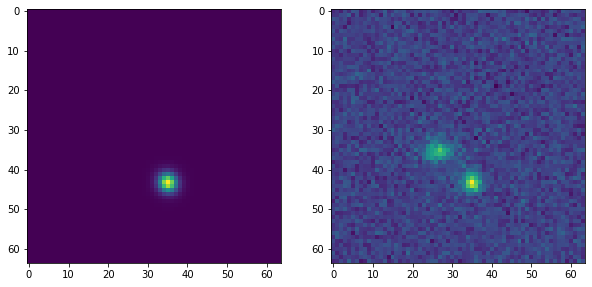

In [46]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

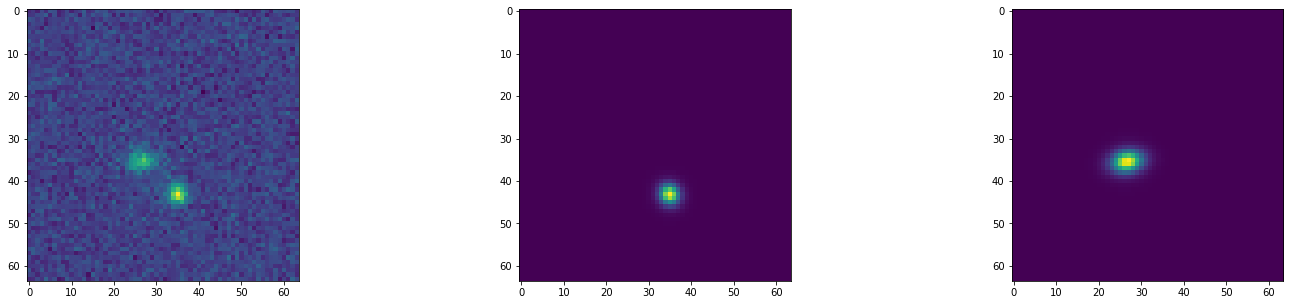

In [47]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Now if I change "training_or_test" into "training" (or validation), only the individual image of the first (and brightest is asked) galaxy added is created.

In [48]:
training_or_test = 'training' # training test validation

In [49]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [50]:
res[0].shape

(10, 64, 64)

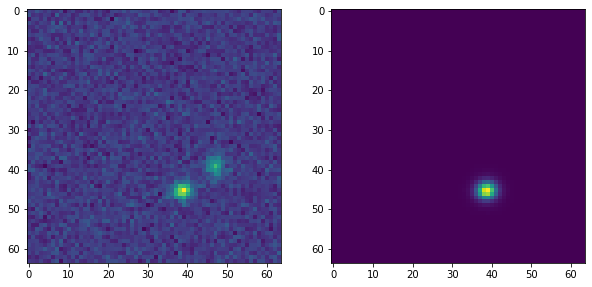

In [51]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[1][6])
ax[1].imshow(res[0][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [22]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [23]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [24]:
res[2]

{'mag_0': 23.96066533735313,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.590860605239868,
 'e1_0': -0.2982252240180969,
 'e2_0': 0.16703525185585022,
 'nb_blended_gal': 1,
 'mag': 23.96066533735313,
 'mag_ir': -3.195945305451902,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 0.0,
 'SNR_peak': 0.0}

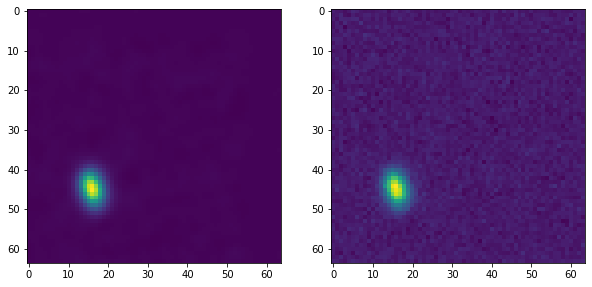

In [25]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [26]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [27]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [28]:
res[2]

{'mag_0': 25.787726974816238,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.8597487211227417,
 'e1_0': -0.2163907140493393,
 'e2_0': 0.11502121388912201,
 'mag_1': 25.630873415717044,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.118441343307495,
 'e1_1': -0.19798754155635834,
 'e2_1': -0.35395142436027527,
 'mag_2': 23.9238655910456,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.652961254119873,
 'e1_2': 0.2091580629348755,
 'e2_2': -0.08484385907649994,
 'mag_3': 25.04644452202693,
 'redshift_3': 0.0,
 'moment_sigma_3': 1.895153284072876,
 'e1_3': -0.15080514550209045,
 'e2_3': -0.15337970852851868,
 'mag_4': 25.176855260105928,
 'redshift_4': 0.0,
 'moment_sigma_4': 1.9008852243423462,
 'e1_4': 0.09545135498046875,
 'e2_4': -0.012223773635923862,
 'mag_5': 25.275601663601385,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.378770112991333,
 'e1_5': -0.1282629370689392,
 'e2_5': 0.012125840410590172,
 'nb_blended_gal': 6,
 'mag': 23.9238655910456,
 'mag_ir': -4.398608898358569,
 'closest_mag': 25.63087341

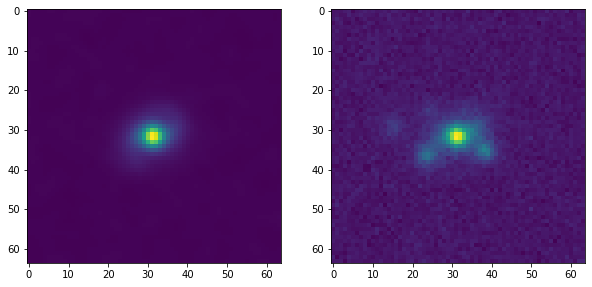

In [29]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6])

Now display all noiseless galaxy images

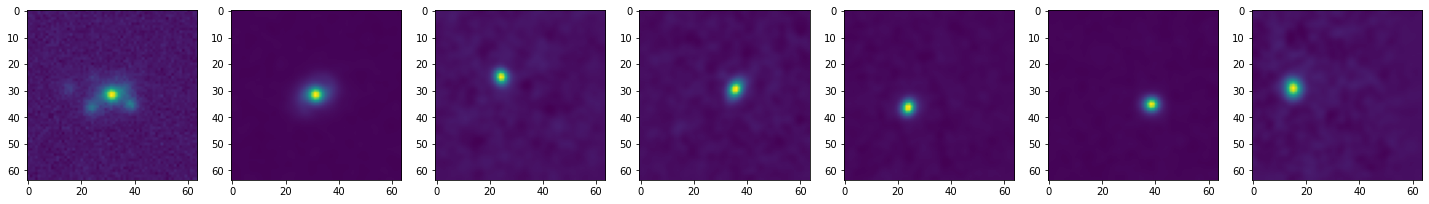

In [30]:
fig, ax = plt.subplots(1,res[2]['nb_blended_gal']+1, figsize =(25,5))
ax[0].imshow(res[1][6])
for i in range (res[2]['nb_blended_gal']):
    ax[i+1].imshow(res[0][i][6])

Test generating a "validation" dataset

In [31]:
training_or_test = 'validation' # training test validation

In [32]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [33]:
res[0].shape

(10, 64, 64)

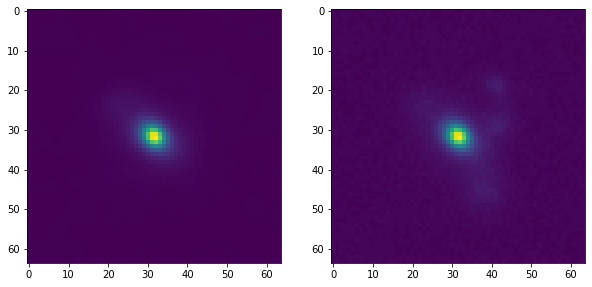

In [34]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [35]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

## With simulations

In [36]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [37]:
res[2]

{'e1_fit_0': -0.1650936508823376,
 'e2_fit_0': -0.05611916666363633,
 'weight_fit_0': 439.11759028171525,
 'e1_fit_1': 0.030859404365421374,
 'e2_fit_1': 0.5438633327511331,
 'weight_fit_1': 313.72418956106156,
 'e1_fit_2': 0.1225588362120875,
 'e2_fit_2': -0.08696532906035345,
 'weight_fit_2': 532.470035637016,
 'e1_fit_3': -0.37847433956955445,
 'e2_fit_3': 0.3845177633792083,
 'weight_fit_3': 507.717654061435,
 'e1_fit_4': -0.8195936726854561,
 'e2_fit_4': -0.38322358487227165,
 'weight_fit_4': 353.56491783432756,
 'e1_fit_5': 0.009542365806017777,
 'e2_fit_5': -0.3565546218899342,
 'weight_fit_5': 467.1626935397261,
 'e1_fit_6': -0.5012857349688667,
 'e2_fit_6': -0.4263870270880992,
 'weight_fit_6': 327.64910848842794,
 'e1_fit_7': 0.10241556482028177,
 'e2_fit_7': 0.27950820868407955,
 'weight_fit_7': 267.4224082920832,
 'e1_fit_8': 0.3066964753028621,
 'e2_fit_8': -0.02175256179890426,
 'weight_fit_8': 291.8437492730213,
 'e1_fit_9': 0.0869014515550916,
 'e2_fit_9': -0.5800489493

In [38]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

69 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

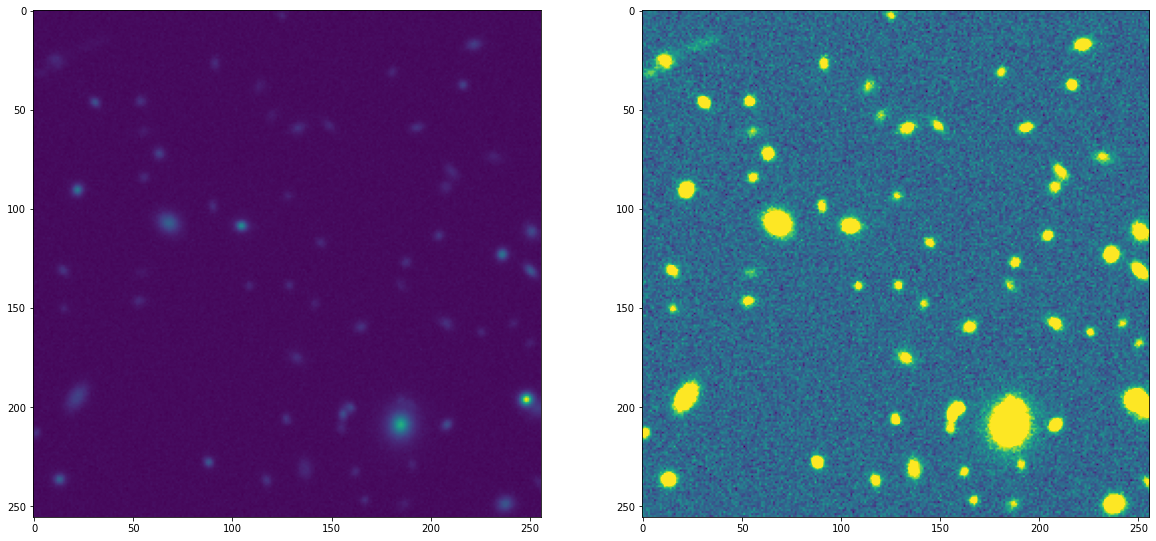

In [39]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


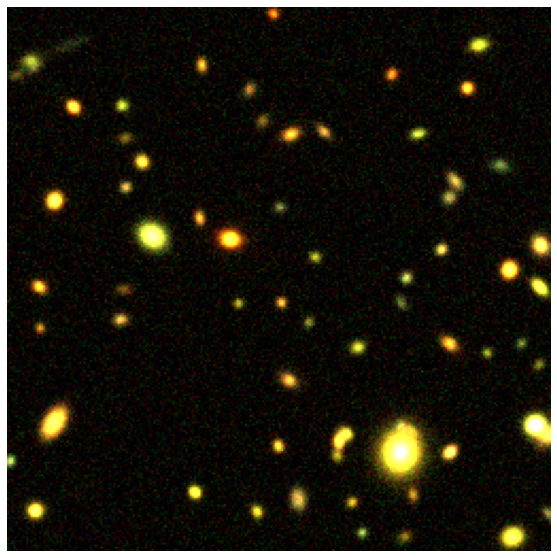

In [40]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


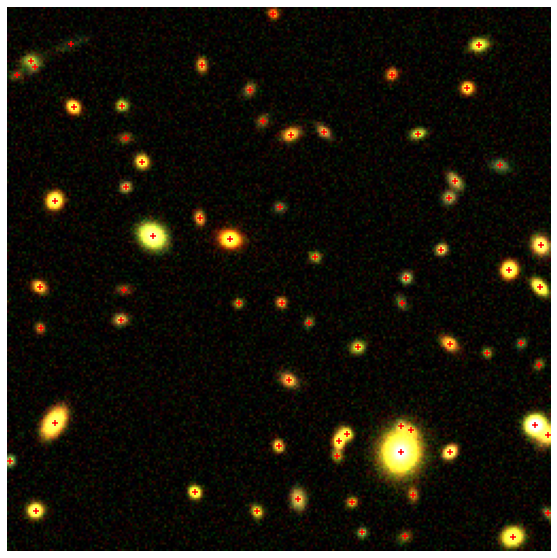

In [41]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [42]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [43]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [44]:
res[2]

{'mag_0': 23.67878929834871,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.1827197074890137,
 'e1_0': 0.04774247482419014,
 'e2_0': -0.055692385882139206,
 'mag_1': 23.995198160296123,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.4695000648498535,
 'e1_1': -0.12658309936523438,
 'e2_1': 0.03346708044409752,
 'mag_2': 22.80604591126541,
 'redshift_2': 0.0,
 'moment_sigma_2': 3.423017740249634,
 'e1_2': 0.229664608836174,
 'e2_2': -0.6599056124687195,
 'mag_3': 23.445079542479565,
 'redshift_3': 0.0,
 'moment_sigma_3': 3.2300968170166016,
 'e1_3': -0.03220055624842644,
 'e2_3': -0.63319331407547,
 'mag_4': 22.544670116416654,
 'redshift_4': 0.0,
 'moment_sigma_4': 4.146794319152832,
 'e1_4': 0.10819346457719803,
 'e2_4': 0.15394605696201324,
 'mag_5': 21.97933541479042,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.209122896194458,
 'e1_5': 0.24790038168430328,
 'e2_5': 0.12320941686630249,
 'mag_6': 22.508547424078955,
 'redshift_6': 0.0,
 'moment_sigma_6': 3.2900333404541016,
 'e1_6': -0.16235658526

In [45]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

79 galaxies are added to this image.


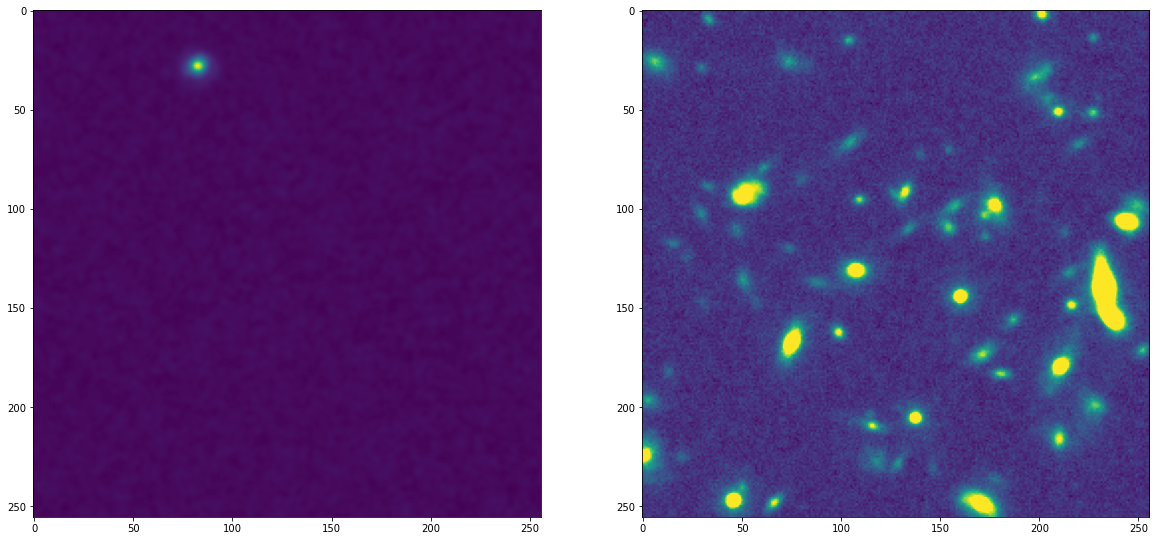

In [46]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


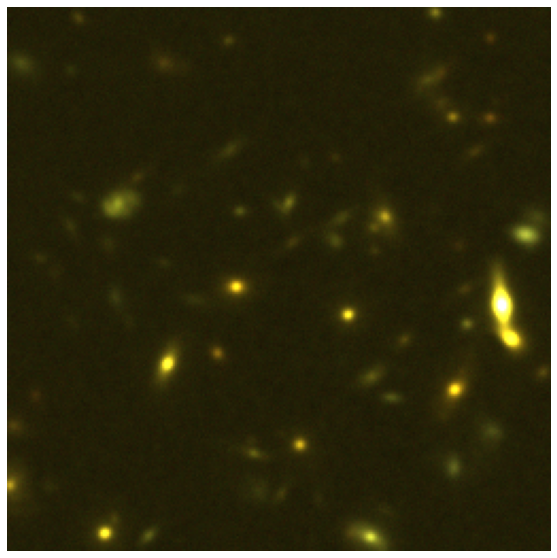

In [47]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


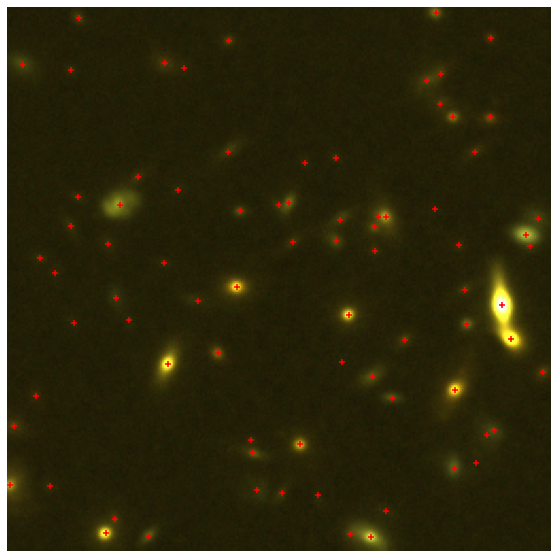

In [48]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)